#**Stellar Object Classification -** ***SDSS17***



---



## **Introduction**
Stellar classification in astronomy is the process of dividing stars into different categories based on their spectral properties. A fundamental concept in astronomy is the categorization of stars, galaxies, quasars(luminous supermassive black holes) and this dataset seeks to categorize them according to their spectral properties.

## **Dataset Overview**
The data consists of 100,000 observations of space taken by the **SDSS** (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a **star, galaxy or quasar.**

*   **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS.
*   **alpha** = Right Ascension angle (at J2000 epoch).
*   **delta** = Declination angle (at J2000 epoch).
*   **u** = Ultraviolet filter in the photometric system.
*   **g** = Green filter in the photometric system.
*   **r** = Red filter in the photometric system.
*   **i** = Near Infrared filter in the photometric system.
*   **z** = Infrared filter in the photometric system.
*   **run_ID** = Run Number used to identify the specific scan.
*   **rereun_ID** = Rerun Number to specify how the image was processed.
*   **cam_col** = Camera column to identify the scanline within the run.
*   **field_ID** = Field number to identify each field.
*   **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class).
*   **class** = Object class (galaxy, star or quasar object).
*   **redshift** = Redshift value based on the increase in wavelength.
*   **plate** = Plate ID, identifies each plate in SDSS.
*   **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS
data was taken.
*   **fiber_ID** = Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation.

## **Background**

##### ***Celestial sphere-*** An imaginary sphere with a large radius centered on Earth or the observer. All objects in the sky can be projected onto it.
##### ***Celestial equator-*** The celestial equator is the imaginary line in the sky that corresponds to Earth's equator.
##### ***Ascension and Declination-*** Ascension measures left/right on the celestial sphere, declination measures up/down.
##### ***Photometric system-*** Photometry is the measurement of light brightness. The UBV photometric system classifies stars by their colors.
##### ***Redshift-*** Reveals how an object in space is moving away from us, and is used to measure distance to the most distant objects in universe.


---

### **Loading the dataset**


---

In [3]:
# Import the files library from Google Colab
from google.colab import files

# Upload files to the notebook
uploaded = files.upload()

Saving star_classification.csv to star_classification (1).csv


In [4]:
# Import the pandas and numpy libraries
import pandas as pd
import numpy as np

# Import the warnings library and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the file into a pandas DataFrame
df = pd.read_csv('star_classification.csv')

### **Exploring the dataset**

---

In [6]:
# Print the first 20 rows of the DataFrame
df.head(20)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [7]:
# Get the shape of the DataFrame i.e number of rows and columns
df.shape

(100000, 18)

In [8]:
# Number of rows and columns and the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [9]:
# Summary statistics of the numerical columns in the DataFrame
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
# Sum of missing values (NaN) in each column
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [11]:
# Sum of duplicate rows
df[df.duplicated()].sum()

obj_ID         0.0
alpha          0.0
delta          0.0
u              0.0
g              0.0
r              0.0
i              0.0
z              0.0
run_ID         0.0
rerun_ID       0.0
cam_col        0.0
field_ID       0.0
spec_obj_ID    0.0
class          0.0
redshift       0.0
plate          0.0
MJD            0.0
fiber_ID       0.0
dtype: float64

## **Exploratory Data Analysis**

---

In [12]:
# Import the matplotlib.pyplot library as plt
import matplotlib.pyplot as plt

In [13]:
# Create a variable to store the class counts
class_count = df["class"].value_counts()
class_count

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

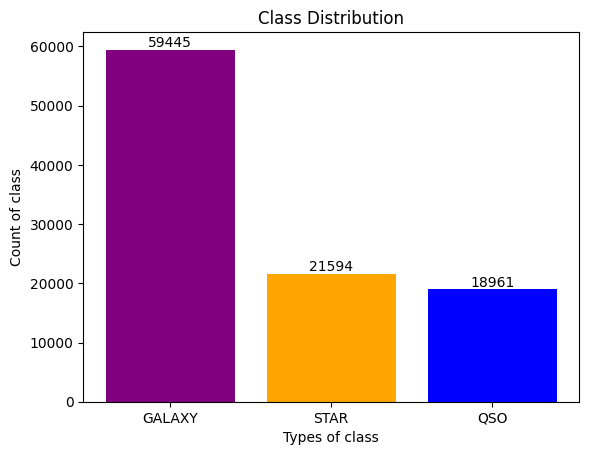

In [14]:
# Create a bar plot of the class distribution
plt.bar(class_count.index, class_count.values, color = ['purple', 'orange', 'blue'])

# Add a text label to each bar
for i, value in enumerate(class_count):
    plt.text(i, value, value, ha='center', va='bottom')

# Set the title of the plot
plt.title("Class Distribution")

# Set the labels for the x-axis and y-axis
plt.xlabel("Types of class")
plt.ylabel("Count of class")

# Show the plot
plt.show()

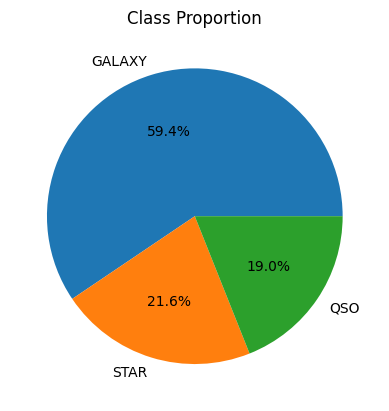

In [15]:
# Create a pie chart of the class proportions
plt.pie(class_count.values, labels=class_count.index, autopct="%1.1f%%")

# Set the title of the plot
plt.title("Class Proportion")
plt.show()

### ***Univariate Analysis***

In [16]:
# Import the Seaborn library
import seaborn as sns

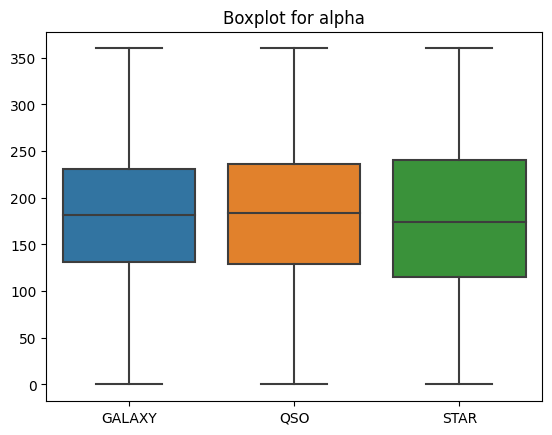

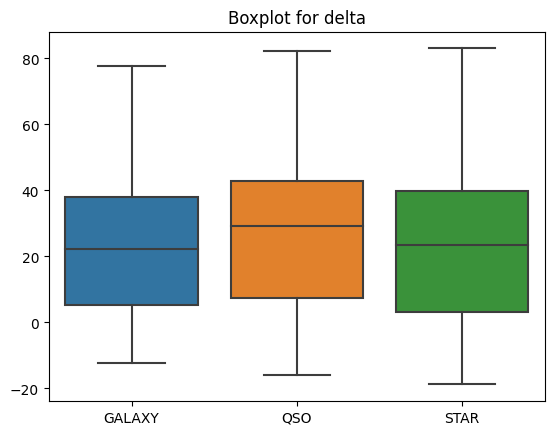

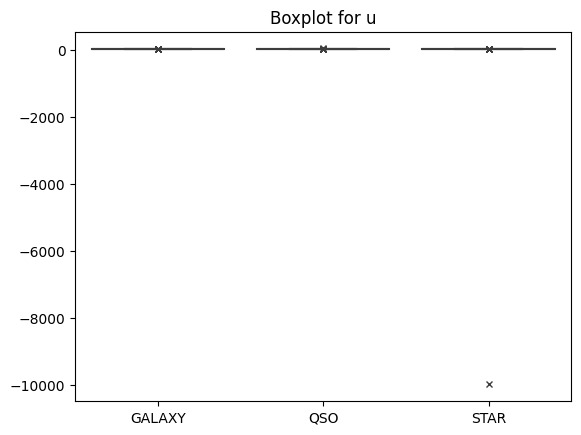

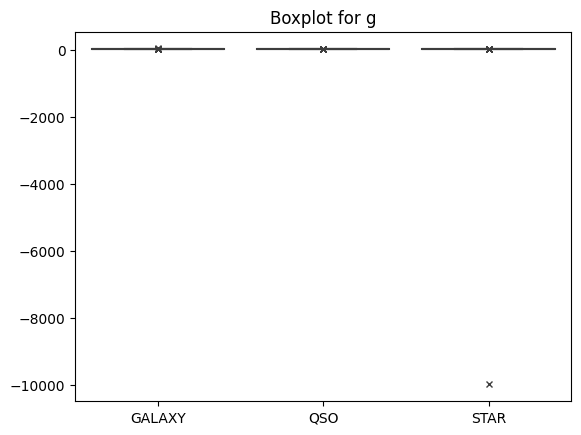

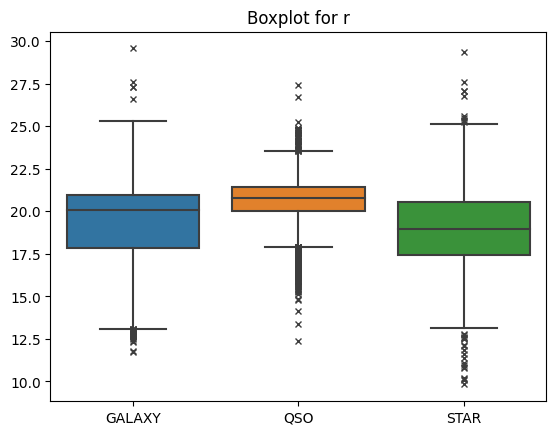

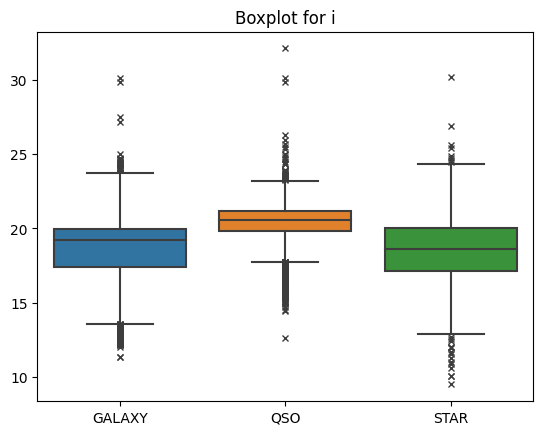

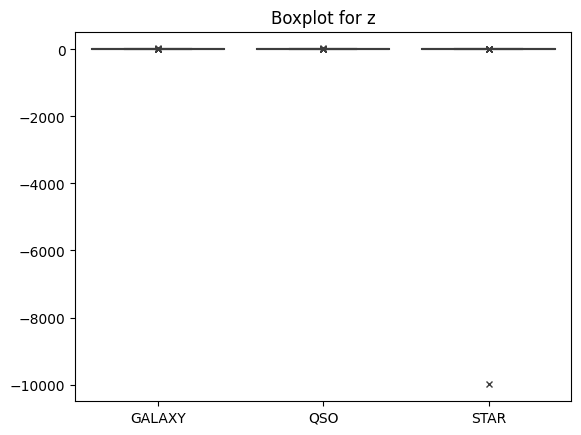

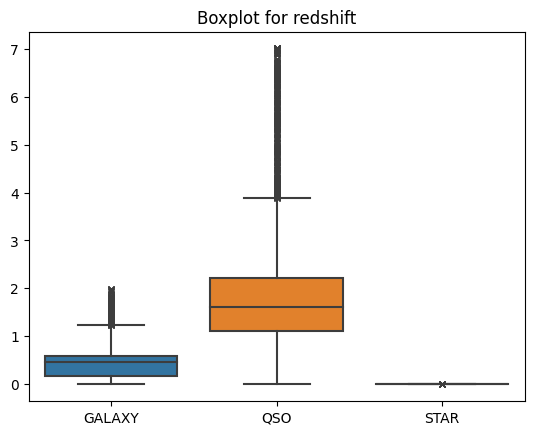

In [17]:
# Create a list of columns to plot
columns = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

# Create a boxplot of the column, grouped by class
for col in columns:
 sns.boxplot(data=df, x='class', y=col, flierprops={'marker': 'x'})
 plt.title(f'Boxplot for {col}')

# Remove the x-axis and y-axis label
 plt.xlabel(xlabel=None)
 plt.ylabel(ylabel=None)
 plt.show()

In [18]:
# Check minimum value in columns to find outlier
display(df[df['u'] == min(df['u'])][columns + ['class']])
display(df[df['g'] == min(df['g'])][columns + ['class']])
display(df[df['z'] == min(df['z'])][columns + ['class']])

,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


,alpha,delta,u,g,r,i,z,redshift,class
79543,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


In [19]:
# Remove the outlier row
df = df.drop(index=[79543])

In [20]:
# Check number of rows and columns
df.shape

(99999, 18)

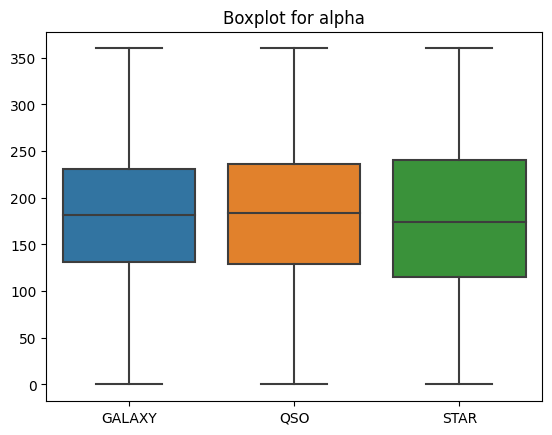

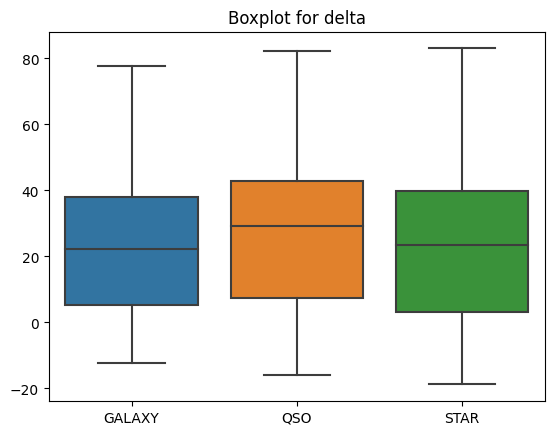

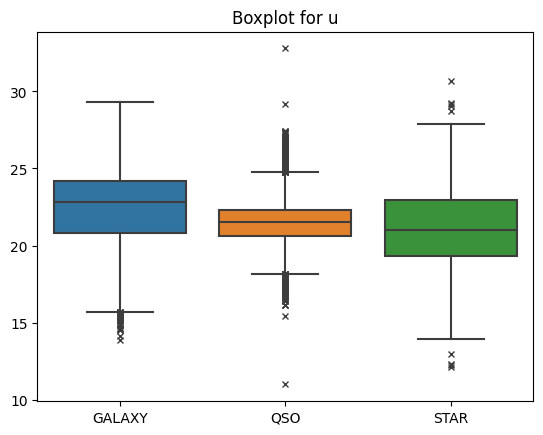

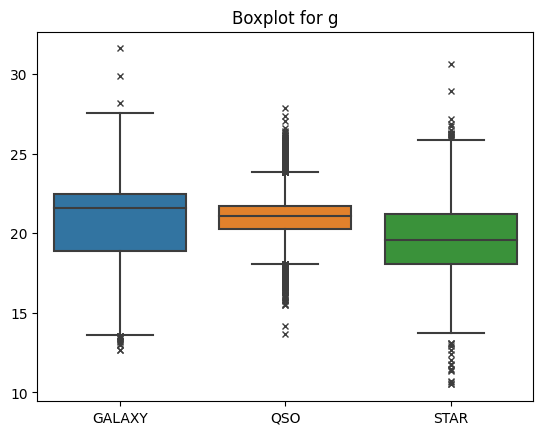

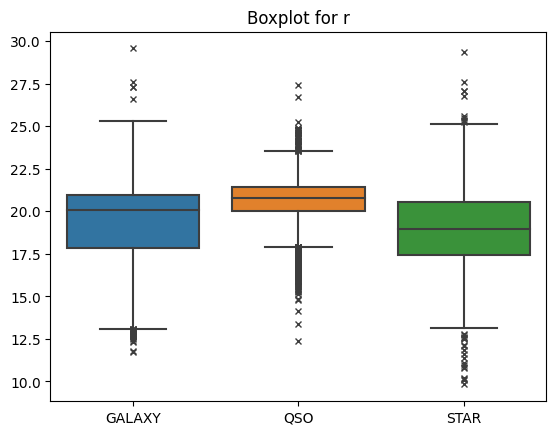

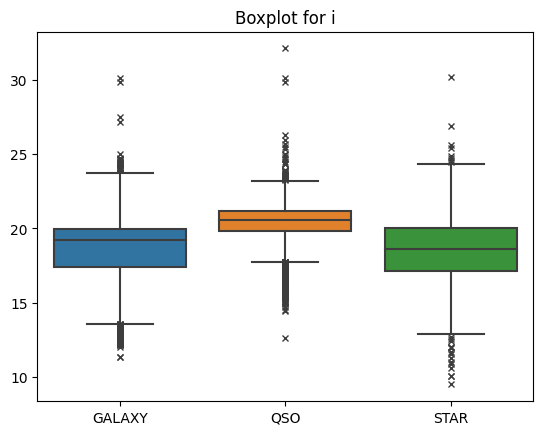

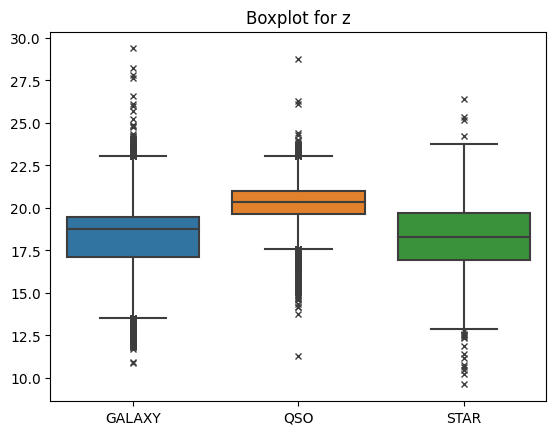

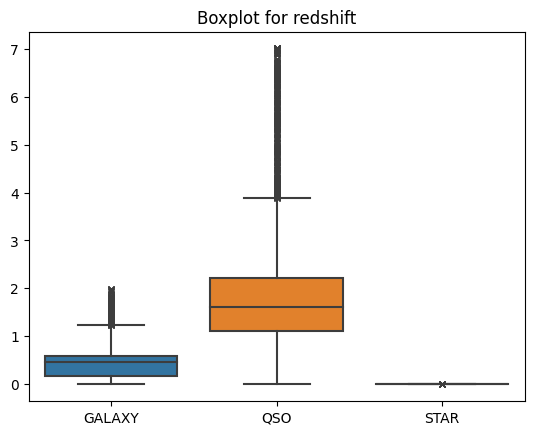

In [21]:
# Create a list of columns to plot
columns = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

# Create a boxplot of the column, grouped by class
for col in columns:
 sns.boxplot(data=df, x='class', y=col, flierprops={'marker': 'x'})
 plt.title(f'Boxplot for {col}')

# Remove the x-axis and y-axis label
 plt.xlabel(xlabel=None)
 plt.ylabel(ylabel=None)
 plt.show()

### *Multivariate Analysis*

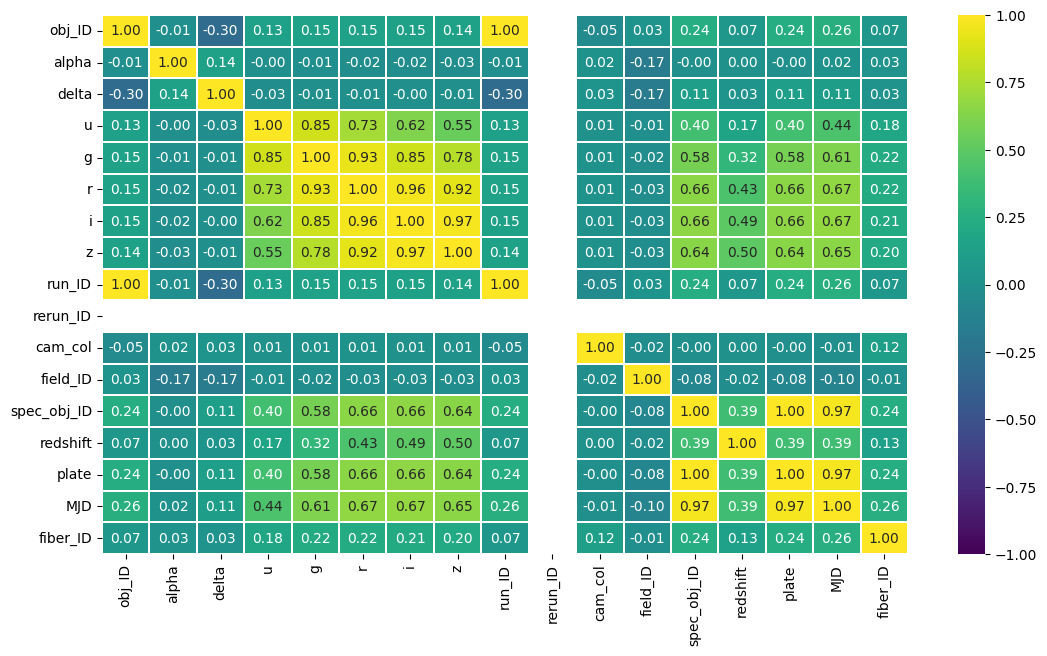

In [22]:
# Create a heatmap of the correlation matrix for the dataframe
plt.figure(figsize=(13,7))
sns.heatmap(data=df.corr(),annot=True, linewidths=0.1, fmt='.2f', cmap='viridis',vmin=-1,vmax=1)
plt.show()

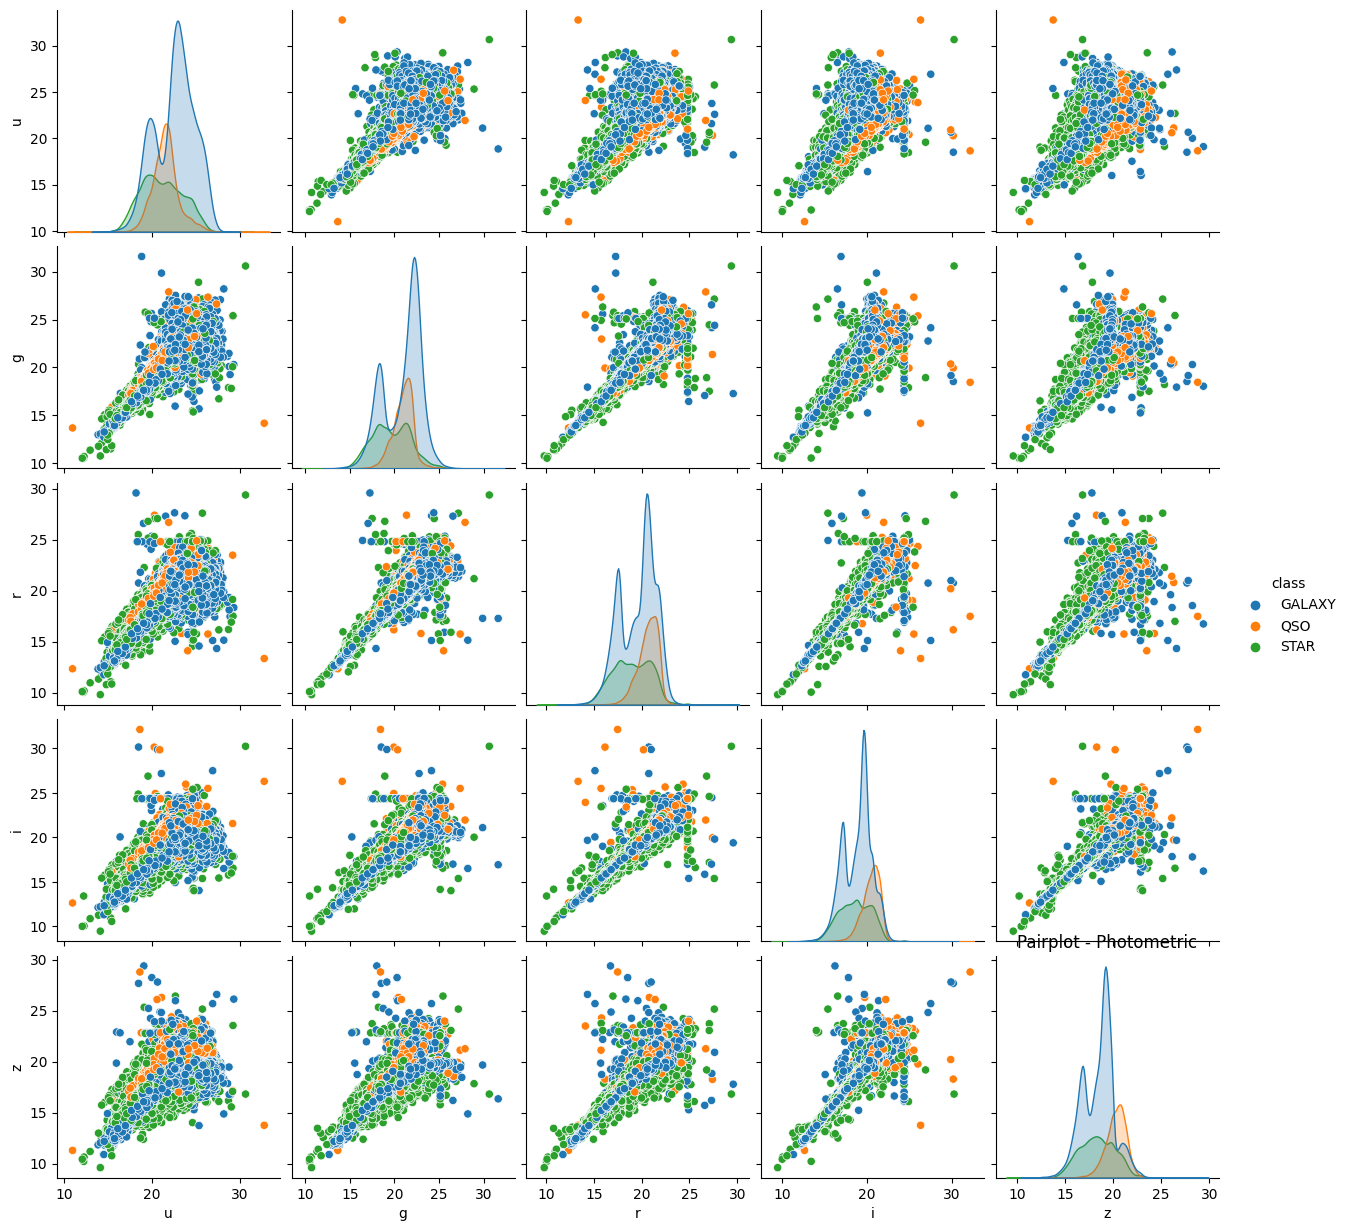

In [23]:
# Create a pairplot of the photometric data, with hue representing the class
sns.pairplot(data=df[['u', 'g', 'r', 'i', 'z', 'class']],hue='class')
plt.title('Pairplot - Photometric')
plt.show()

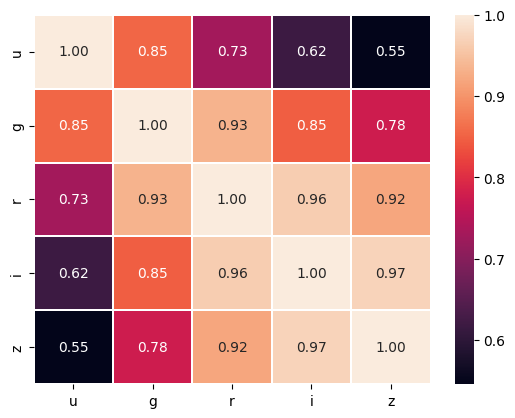

In [24]:
# Create a heatmap of the correlation matrix for the variables u, g, r, i, and z
sns.heatmap(data=df[['u', 'g', 'r', 'i', 'z']].corr(),annot=True, linewidths=0.1, fmt='.2f')
plt.show()

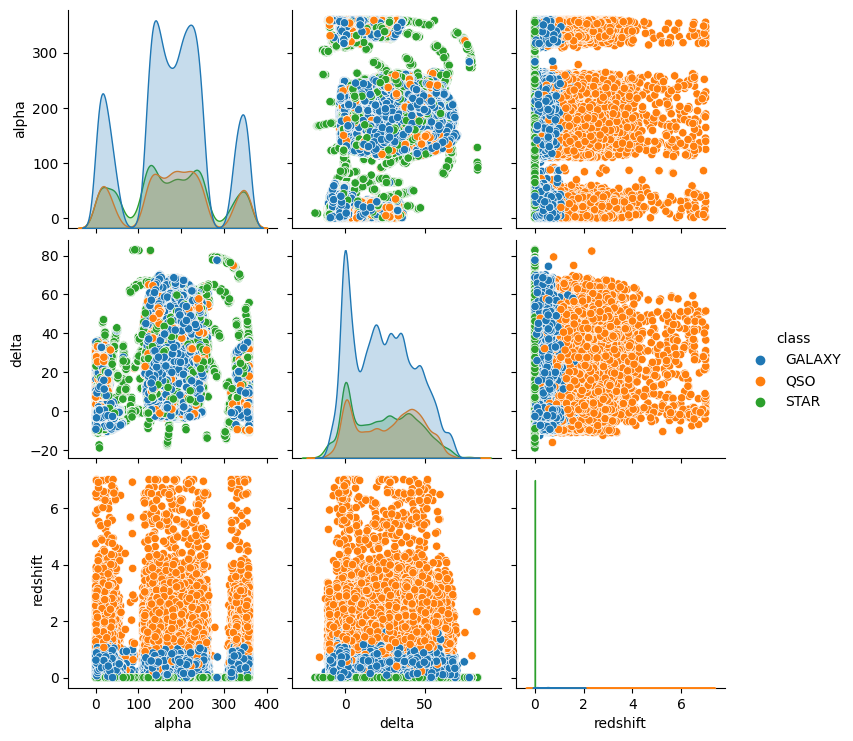

In [25]:
# Create a pairplot of the data, with the hue parameter set to the 'class' column
sns.pairplot(data=df[['alpha', 'delta', 'redshift', 'class']],hue='class')
plt.show()

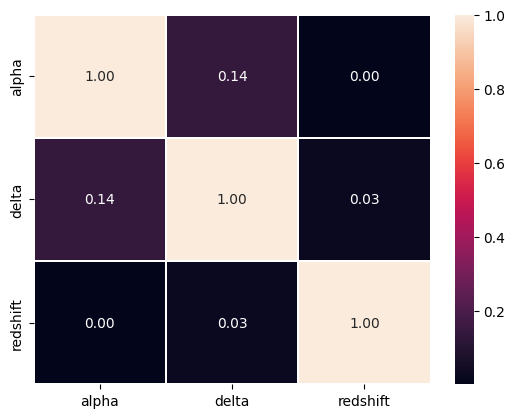

In [26]:
# Plot the correlation matrix as a heatmap
sns.heatmap(data=df[['alpha', 'delta', 'redshift', 'class']].corr(),annot=True, linewidths=0.1, fmt='.2f')
plt.show()

### **Model Training & Evaluation**

---

Converting categorical variables to numerical values

In [27]:
df['class'].value_counts()

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

In [28]:
# Create a dictionary to map the class labels to integers
class_mapping = {'GALAXY':1,'STAR':2,'QSO':3}

# Apply the mapping to the class labels in the dataframe
df['class'] = df['class'].map(class_mapping)

In [29]:
df.shape

(99999, 18)

In [30]:
df.head(20)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,1,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,1,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,1,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,1,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,1,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,3,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,3,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,1,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,1,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,2,-0.000008,2444,54082,232


### *Train Test Split*

In [31]:
# Create the feature matrix X by dropping the class, obj_ID, run_ID, rerun_ID, field_ID, fiber_ID, and spec_obj_ID columns
X = df.drop(['class','obj_ID','run_ID', 'rerun_ID', 'field_ID','fiber_ID','spec_obj_ID'], axis = 1)

# Create the target vector y by selecting the class column
y = df.loc[:,'class'].values

In [32]:
# Import the preprocessing module, it provides functions and classes for preprocessing data, such as scaling and transforming features.
import sklearn.preprocessing

# Import the StandardScaler class from the preprocessing module which is used to normalize features by subtracting the mean and dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler

In [33]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler object to the data
X = scaler.fit_transform(X)

# Create a Pandas DataFrame from the scaled data
X = pd.DataFrame(X,columns=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'plate', 'MJD'])
X.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,-0.434597,0.425517,0.798798,0.806782,0.403953,0.046001,0.013999,-0.952562,0.079549,0.228626,0.423198
1,-0.339915,0.363391,1.198064,1.079967,1.584395,1.185087,1.611170,0.937911,0.277088,1.797912,1.420719
2,-0.367244,0.582702,1.413732,0.997513,0.519736,0.150012,0.101520,-0.952562,0.092415,-0.190031,0.001850
3,1.669522,-1.249122,0.024940,1.543642,1.059894,0.807601,0.272435,-0.322404,0.486761,1.358932,1.354918
4,1.737308,-0.150255,-1.174337,-1.497665,-1.697426,-1.767888,-1.825836,-0.322404,-0.630273,0.333290,0.330855


In [34]:
# Import the model_selection module from scikit-learn
import sklearn.model_selection

# Import the train_test_split function from the model_selection module
from sklearn.model_selection import train_test_split

In [35]:
# Split the data into training and test sets
# X is the feature data and y is the label data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Data is split as 70% training and 30% test and same split is used each time the code is run


## **Defining models**

---



### *Logistic Regression*

In [36]:
# Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Import the confusion_matrix, classification_report, and accuracy_score functions from sklearn.metrics
import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

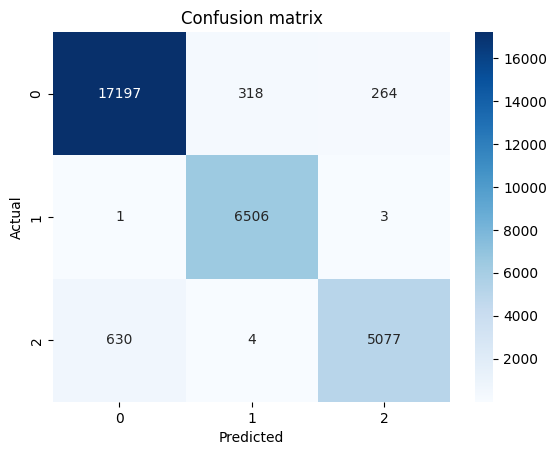

              precision    recall  f1-score   support

           1       0.96      0.97      0.97     17779
           2       0.95      1.00      0.98      6510
           3       0.95      0.89      0.92      5711

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

Accuracy for Logistic regression: 95.93 %


In [37]:
# Create a Logistic Regression object
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict the labels for the test data
lr_pred = lr_model.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,lr_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,lr_pred))

# Calculate the accuracy of the model
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracy of the model
print('Accuracy for Logistic regression:', round(lr_accuracy*100,2),'%')

### *K-Nearest Neighbours*

In [38]:
# Import the KNeighborsClassifier class from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

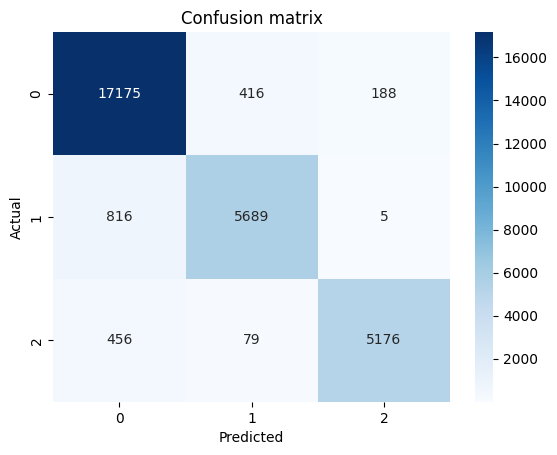

              precision    recall  f1-score   support

           1       0.93      0.97      0.95     17779
           2       0.92      0.87      0.90      6510
           3       0.96      0.91      0.93      5711

    accuracy                           0.93     30000
   macro avg       0.94      0.92      0.93     30000
weighted avg       0.93      0.93      0.93     30000

Accuracy for KNN: 93.47 %


In [39]:
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
knn_pred = knn.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,knn_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,knn_pred))

# Calculate the accuracy of the model
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print the accuracy of the model
print('Accuracy for KNN:', round(knn_accuracy*100,2),'%')

### *SVM*

In [40]:
# Import the SVC class from sklearn.svm
from sklearn.svm import SVC

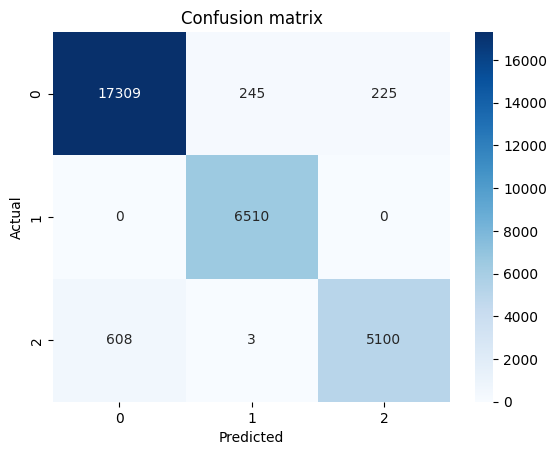

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     17779
           2       0.96      1.00      0.98      6510
           3       0.96      0.89      0.92      5711

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000

Accuracy for SVM: 96.4 %


In [41]:
# Create a SVC object with a linear kernel
svm = SVC(kernel="linear")

# Fit the classifier to the training data
svm.fit(X_train, y_train)

# Predict the labels for the test data
svm_pred = svm.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,svm_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,svm_pred))

# Calculate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracy of the model
print("Accuracy for SVM:", round(svm_accuracy*100,2),'%')

### *Decision Tree*

In [42]:
# Import the DecisionTreeClassifier class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

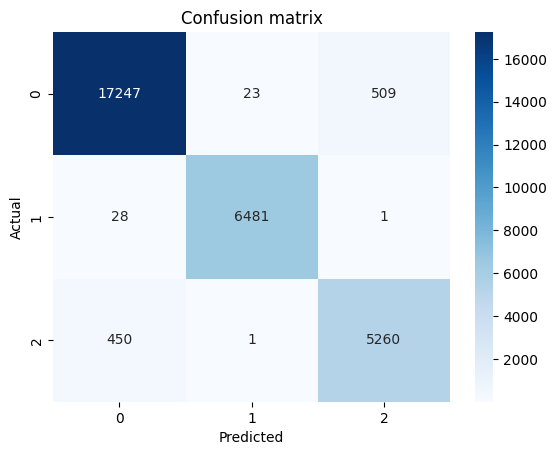

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     17779
           2       1.00      1.00      1.00      6510
           3       0.91      0.92      0.92      5711

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000

Accuracy for Decision Tree: 96.63 %


In [43]:
# Create a decision tree classifier object
dt = DecisionTreeClassifier()

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the labels for the test data
dt_pred = dt.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,dt_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,dt_pred))

# Calculate the accuracy of the model
dt_accuracy = accuracy_score(y_test, dt_pred)

# Print the accuracy of the model
print("Accuracy for Decision Tree:", round(dt_accuracy*100,2),'%')

### *Random Forest*

In [44]:
# Import the RandomForestClassifier class from the sklearn.ensemble library
from sklearn.ensemble import RandomForestClassifier

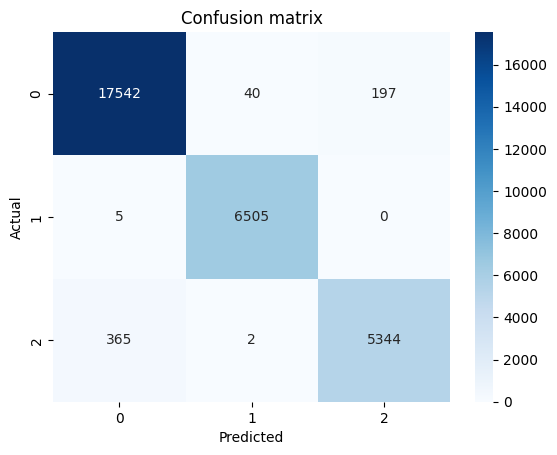

              precision    recall  f1-score   support

           1       0.98      0.99      0.98     17779
           2       0.99      1.00      1.00      6510
           3       0.96      0.94      0.95      5711

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Accuracy for Random Forest: 97.97 %


In [45]:
# Create a random forest classifier object
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
rf_pred = rf.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,rf_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,rf_pred))

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the accuracy of the model
print("Accuracy for Random Forest:", round(rf_accuracy*100,2),'%')

### *Gaussian Naive Bayes*


In [46]:
# Import the GaussianNB class from the sklearn.naive_bayes library
from sklearn.naive_bayes import GaussianNB

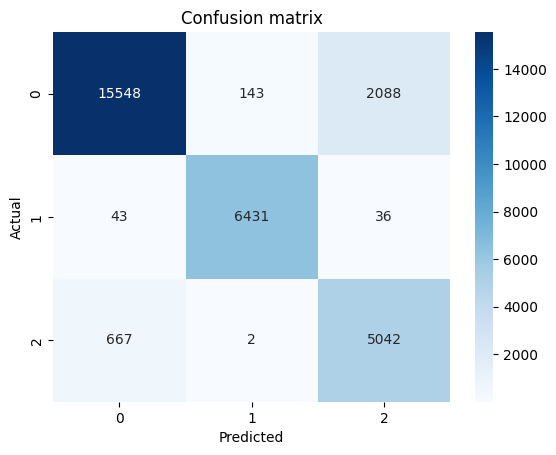

              precision    recall  f1-score   support

           1       0.96      0.87      0.91     17779
           2       0.98      0.99      0.98      6510
           3       0.70      0.88      0.78      5711

    accuracy                           0.90     30000
   macro avg       0.88      0.92      0.89     30000
weighted avg       0.91      0.90      0.90     30000

Accuracy for Gaussian Naive Bayes: 90.07 %


In [47]:
# Create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Predict the labels for the test data
gnb_pred = gnb.predict(X_test)

# Create a confusion matrix to assess the model's accuracy
cm = confusion_matrix(y_test,gnb_pred)

# Plot the confusion matrix
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test,gnb_pred))

# Calculate the accuracy of the model
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# Print the accuracy of the model
print("Accuracy for Gaussian Naive Bayes:", round(gnb_accuracy*100,2),'%')


## **Performance Analysis**

---



Accuracy for Logistic regression: 95.93 %
Accuracy for KNN: 93.47 %
Accuracy for SVM: 96.4 %
Accuracy for Decision Tree: 96.63 %
Accuracy for Random Forest: 97.97 %
Accuracy for Gaussian Naive Bayes: 90.07 %




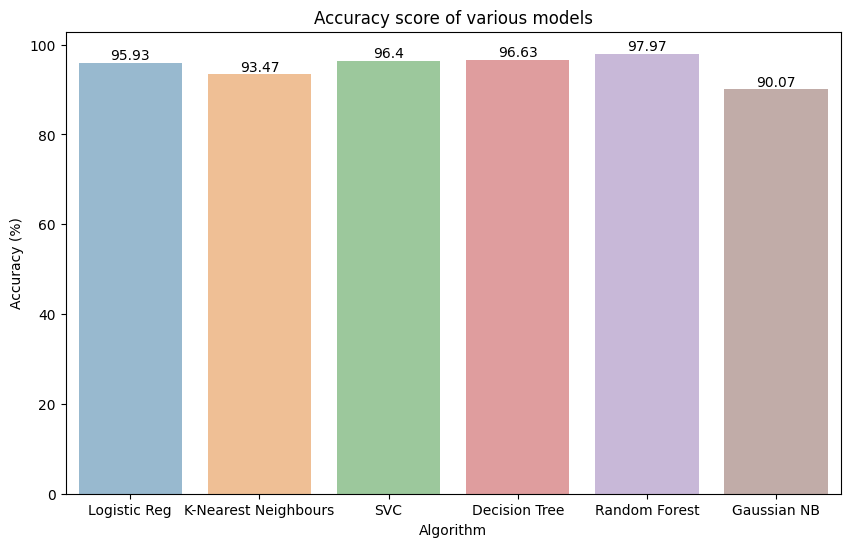

In [48]:
# Print the accuracy of the different machine learning models
print('Accuracy for Logistic regression:', round(lr_accuracy*100,2),'%')
print('Accuracy for KNN:', round(knn_accuracy*100,2),'%')
print("Accuracy for SVM:", round(svm_accuracy*100,2),'%')
print("Accuracy for Decision Tree:", round(dt_accuracy*100,2),'%')
print("Accuracy for Random Forest:", round(rf_accuracy*100,2),'%')
print("Accuracy for Gaussian Naive Bayes:", round(gnb_accuracy*100,2),'%' )
print('\n')

# Create a dictionary to store the accuracies of the different algorithms
x = {'Accuracy':[lr_accuracy,knn_accuracy,svm_accuracy,dt_accuracy,rf_accuracy,gnb_accuracy]}

# Create a Pandas DataFrame from the dictionary
df1 = pd.DataFrame(x)

# Round the accuracy values to two decimal places
df1['Accuracy'] = round(df1['Accuracy']*100, 2)

# Add a new column to the DataFrame to store the names of the algorithms
df1['Algorithm']  = ['Logistic Reg','K-Nearest Neighbours','SVC','Decision Tree','Random Forest','Gaussian NB']

# Plot a bar chart of the accuracies of the different algorithms
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Algorithm', y='Accuracy', alpha=0.5)

# For each bar in the bar chart, add a text label with the accuracy value
for i in range(len(df1)):
    plt.text(i, df1.loc[i, 'Accuracy'], df1.loc[i, 'Accuracy'], ha='center', va='bottom')

# Set the title of the chart
plt.title('Accuracy score of various models')

# Set the x-axis and y-axis label
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.show()

Random Forest classifier gives the highest accuracy amongst all the models and Gaussian Naive Bayes performs the worst.

---

